In [4]:
### 2. Download the CAR DETAILS dataset and perform Data cleaning and Data Pre-Processing if Necessary.
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv(r"C:\Users\putta\Downloads\CAR DETAILS.csv")

# Display the first few rows and get initial info about the dataset
print("Initial Data Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())


Initial Data Preview:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 


In [5]:
#  Handle Missing Values
# Check for missing values
print("\nMissing Values by Column:")
print(df.isnull().sum())

# If there are any missing values, handle them accordingly
# For example, filling missing values in categorical columns with the mode and numerical columns with the median
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)
df['seller_type'].fillna(df['seller_type'].mode()[0], inplace=True)
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['owner'].fillna(df['owner'].mode()[0], inplace=True)


Missing Values by Column:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [6]:
# Remove Duplicates
df.drop_duplicates(inplace=True)


In [7]:
# Correct Data Types
# Convert 'year' to int if it's not already
df['year'] = df['year'].astype(int)


In [8]:
# Fix Inconsistent Data
# Standardize categorical values if needed (e.g., "petrol" and "Petrol" should be uniform)
df['fuel'] = df['fuel'].str.capitalize()

In [9]:
#  Outlier Detection
# For example, removing outliers in 'selling_price' and 'km_driven' based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers(df, 'selling_price')
df = remove_outliers(df, 'km_driven')

In [10]:
# Data Preprocessing

# Encoding Categorical Variables
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])

# Feature Scaling for numerical columns
scaler = StandardScaler()
df[['selling_price', 'km_driven']] = scaler.fit_transform(df[['selling_price', 'km_driven']])

# Optional: Adding new features, e.g., Car Age
df['car_age'] = 2024 - df['year']

# Export the cleaned and preprocessed data
df.to_csv("cleaned_car_details.csv", index=False)



In [11]:
### 3. Use the various methods such as Handling null values, One-Hot Encoding, Imputation and Scaling of Data Pre-Processing where necessary.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [12]:
# Display initial data info
print("Initial Dataset Information:")
print(df.info())

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3287 non-null   object 
 1   year           3287 non-null   int32  
 2   selling_price  3287 non-null   float64
 3   km_driven      3287 non-null   float64
 4   fuel           3287 non-null   int32  
 5   seller_type    3287 non-null   int32  
 6   transmission   3287 non-null   int32  
 7   owner          3287 non-null   int32  
 8   car_age        3287 non-null   int32  
dtypes: float64(2), int32(6), object(1)
memory usage: 179.8+ KB
None


In [13]:
## step:1  Handling Null Values

# Check for missing values
print("\nMissing Values by Column:")
print(df.isnull().sum())


Missing Values by Column:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
car_age          0
dtype: int64


In [14]:
# Separate columns into numerical and categorical
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [15]:
# Impute missing values for numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [16]:
# Impute missing values for categorical columns with the most frequent value (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [17]:
## Step 2: One-Hot Encoding for Categorical Variables

# We use OneHotEncoder to transform categorical columns to a binary format
# This creates new columns for each unique category in each categorical column
# Setting drop='first' to avoid multicollinearity (if modeling)

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nDataset after One-Hot Encoding:")
print(df.head())


Dataset after One-Hot Encoding:
   year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2007      -1.313167   0.141968     4            1             1      0   
1  2007      -1.017173  -0.414416     4            1             1      0   
2  2012       0.817991   0.976544     1            1             1      0   
3  2017      -0.563315  -0.525693     4            1             1      0   
4  2014       0.226002   2.117131     1            1             1      2   

   car_age  name_Ambassador Classic 2000 Dsz  \
0       17                                 0   
1       17                                 0   
2       12                                 0   
3        7                                 0   
4       10                                 0   

   name_Ambassador Grand 1800 ISZ MPFI PW CL  ...  \
0                                          0  ...   
1                                          0  ...   
2                                          0  ...   
3  

In [18]:
## Step 3: Scaling Numerical Data
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler and apply it to the numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])



In [21]:
### 4. Perform Exploratory data analysis (EDA) on the Data and perform Graphical Analysis on the Data. Include the graphs with conclusions from the Graphical Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Set up the general style for the plots
sns.set(style="whitegrid")

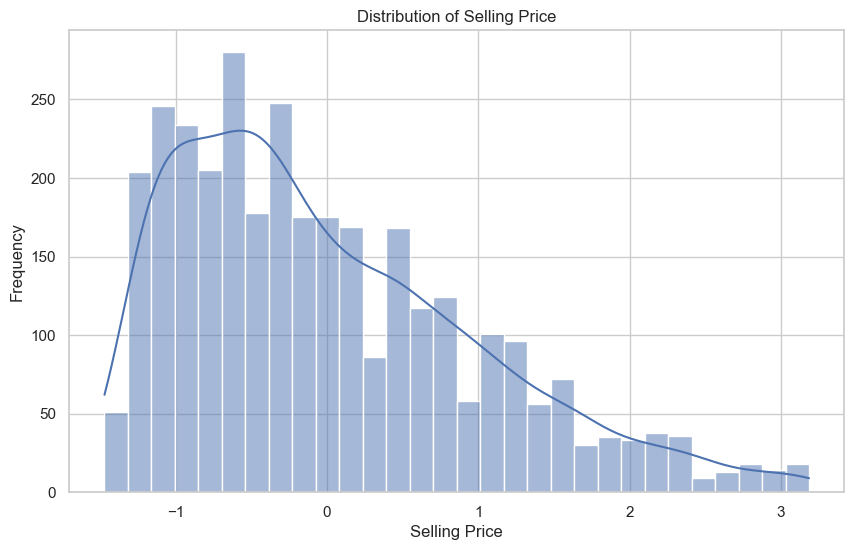

In [23]:
# 1. Distribution of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

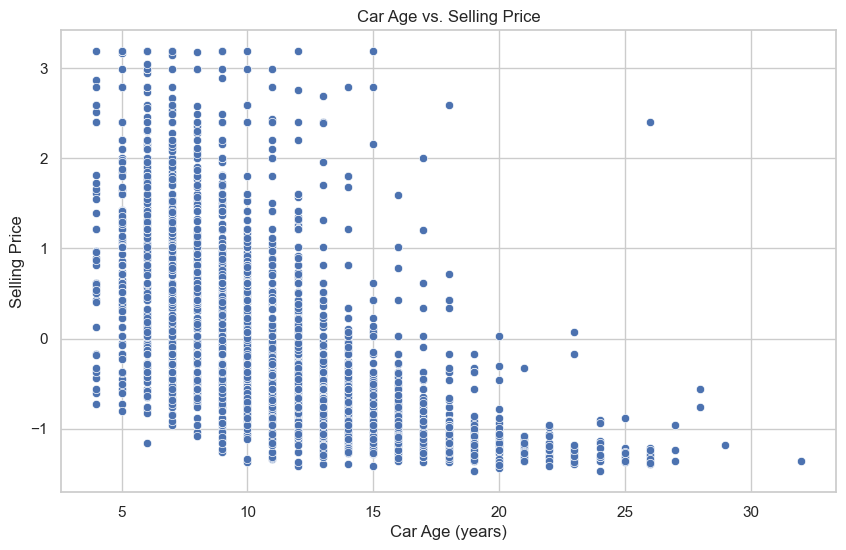

In [24]:
# 2. Age of Cars (derived from 'year') vs. Selling Price
df['car_age'] = 2024 - df['year']  # Assuming 2024 is the current year

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='car_age', y='selling_price')
plt.title("Car Age vs. Selling Price")
plt.xlabel("Car Age (years)")
plt.ylabel("Selling Price")
plt.show()

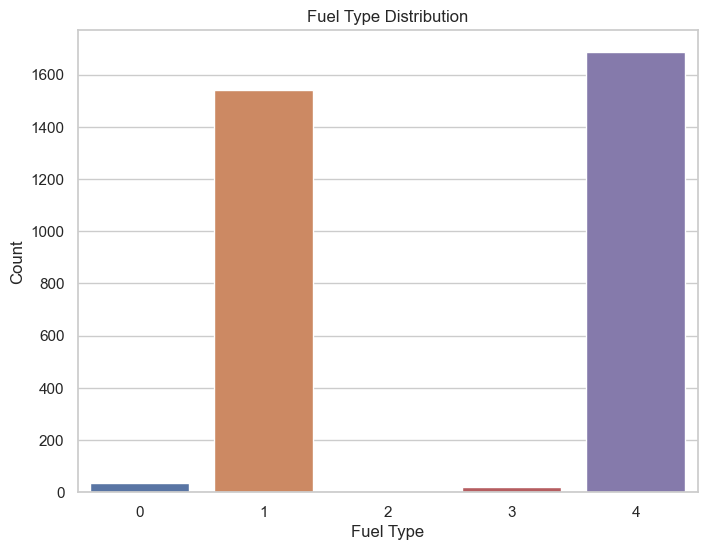

In [25]:
# 3. Fuel Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='fuel')
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

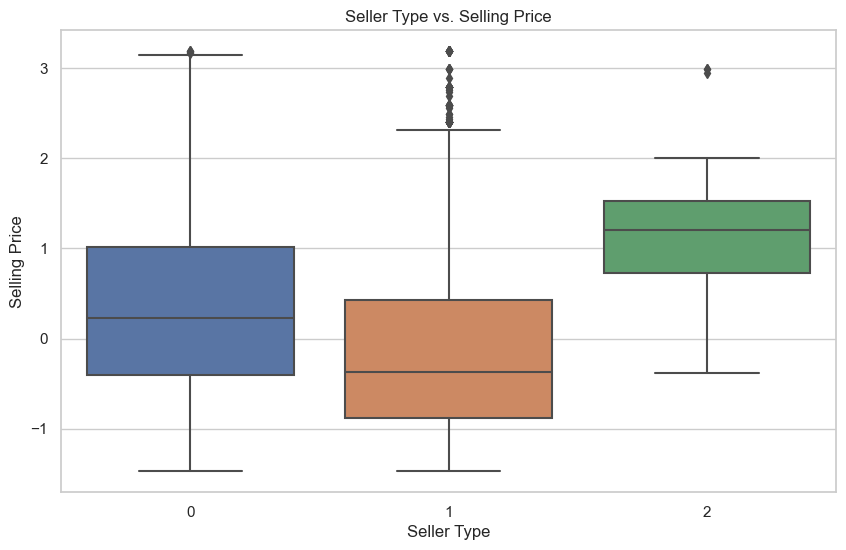

In [26]:
# 4. Seller Type vs. Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='seller_type', y='selling_price')
plt.title("Seller Type vs. Selling Price")
plt.xlabel("Seller Type")
plt.ylabel("Selling Price")
plt.show()

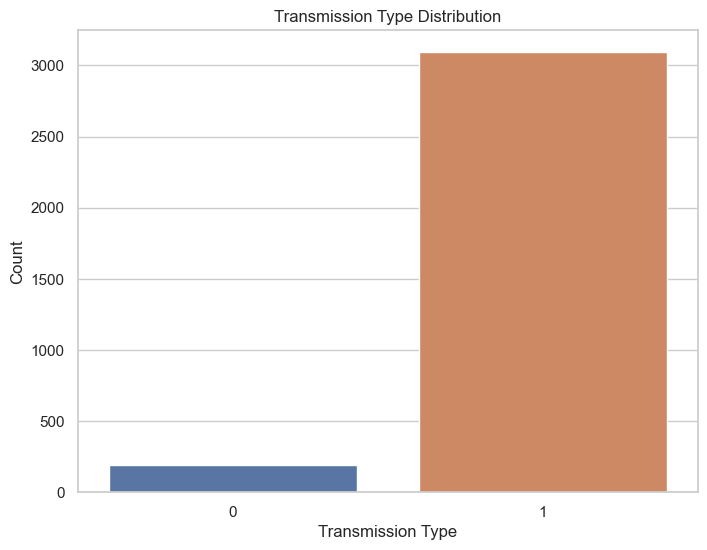

In [27]:
# 5. Transmission Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='transmission')
plt.title("Transmission Type Distribution")
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.show()

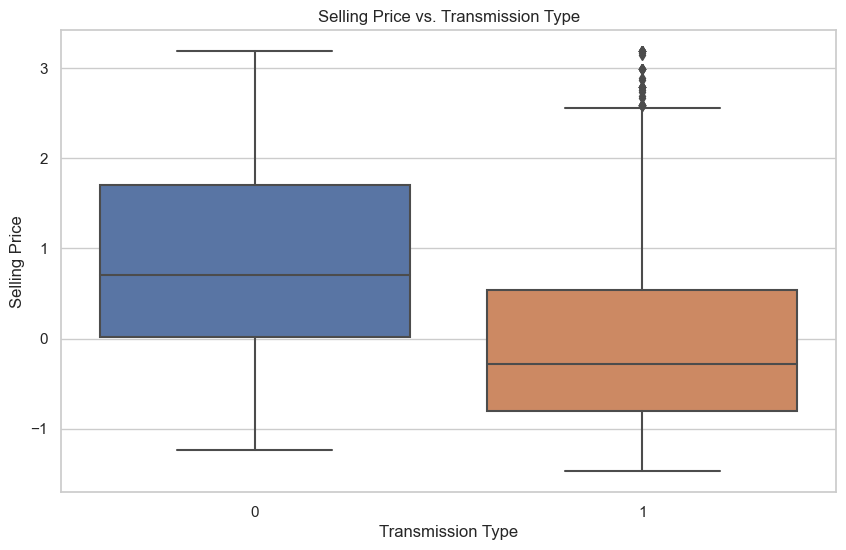

In [28]:
# 6. Selling Price vs. Transmission Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission', y='selling_price')
plt.title("Selling Price vs. Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price")
plt.show()


In [ ]:
# 7. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
### 5. Prepare the Data for Machine Learning modeling.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Step 1: Feature Engineering
# If not already added, create a 'car_age' feature by subtracting the 'year' column from the current year
df['car_age'] = 2024 - df['year']

# Drop columns that won't be used in modeling (e.g., 'name' if it is irrelevant to the target)
df = df.drop(columns=['name', 'year'])  # 'year' can be dropped as we have 'car_age'

In [ ]:
# Step 2: Define the Target Variable and Features
X = df.drop(columns=['selling_price'])
y = df['selling_price']

In [ ]:
# Step 3: Set up Preprocessing for Numerical and Categorical Features
# Identify categorical and numerical columns
cat_features = X.select_dtypes(include=['object']).columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data (Standard Scaling)
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data (One-Hot Encoding)
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))  # drop first to avoid multicollinearity
])

# Combine transformations into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [ ]:
# Step 4: Create Preprocessing and Model Pipeline (example with preprocessor only)
# For now, we can prepare the preprocessor pipeline, which can later be added to a modeling pipeline

# Apply preprocessing to the features
X_prepared = preprocessor.fit_transform(X)


In [ ]:
# Step 5: Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Check the shape of the prepared data
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

# Optional: Save processed data for easy access in modeling
# pd.DataFrame(X_train).to_csv("X_train_preprocessed.csv", index=False)
# pd.DataFrame(X_test).to_csv("X_test_preprocessed.csv", index=False)
# pd.DataFrame(y_train).to_csv("y_train.csv", index=False)
# pd.DataFrame(y_test).to_csv("y_test.csv", index=False)

print("\nData Preprocessing Complete. Data is ready for Machine Learning modeling.")

In [ ]:
### 6. Apply various Machine Learning techniques such as Regression or classification ,Bagging, Ensemble techniques and find out the best model using various Machine Learning model evaluation metrics
##Code for Machine Learning Model Application and Evaluation
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load preprocessed data (assuming the data has been preprocessed as shown previously)
X = pd.read_csv("X_train_preprocessed.csv")
y = pd.read_csv("y_train.csv").values.ravel()  # Ensure y is in the right shape

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training and Evaluation

# Define a function to evaluate and print metrics for a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model.__class__.__name__} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}\n")
    
    return r2 

In [ ]:
# 1. Linear Regression (Baseline)
linear_reg = LinearRegression()
linear_reg_r2 = evaluate_model(linear_reg, X_train, X_test, y_train, y_test)

In [ ]:
# 2. Random Forest Regressor (Bagging Technique)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
rf_r2 = evaluate_model(random_forest, X_train, X_test, y_train, y_test)

In [ ]:
# 3. Gradient Boosting Regressor (Ensemble Technique)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_r2 = evaluate_model(gbr, X_train, X_test, y_train, y_test)

In [ ]:
# 4. Bagging Regressor with Linear Regression as base estimator
bagging_reg = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
bagging_reg_r2 = evaluate_model(bagging_reg, X_train, X_test, y_train, y_test)

In [ ]:
# 5. Ensemble Comparison Summary
print("Summary of Model R^2 Scores:")
print(f"Linear Regression: {linear_reg_r2:.2f}")
print(f"Random Forest Regressor: {rf_r2:.2f}")
print(f"Gradient Boosting Regressor: {gbr_r2:.2f}")
print(f"Bagging Regressor (with Linear Regression): {bagging_reg_r2:.2f}")

In [ ]:
### 7. Save the best model and Load the model.
# Save the Best Model
import joblib

# Assuming `best_model` is the model with the highest performance
# For instance, if Gradient Boosting Regressor performed best:
best_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
best_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(best_model, "best_model.pkl")
print("Best model saved as 'best_model.pkl'")


In [ ]:
# load the saved model
# Load the model from the file
loaded_model = joblib.load("best_model.pkl")
print("Model loaded successfully.")

# Make predictions (example)
# Assuming `X_test` is the test set or new data for prediction
y_pred = loaded_model.predict(X_test)

# Print or evaluate predictions as needed
print("Predictions:", y_pred)


In [ ]:
### 8. Take the original data set and make another dataset by randomly picking 20 data points from the CAR DETAILS dataset and apply the saved model on the same Dataset and test the model.
import pandas as pd
import joblib
import numpy as np

In [ ]:
# Step 1: Randomly pick 20 data points from the original dataset
random_sample = df.sample(n=20, random_state=42)

In [ ]:
# Step 2: Prepare the same preprocessing steps (apply the same transformations as done during model training)
# Assuming preprocessing was done earlier, let's replicate the necessary steps:
# Recalculate 'car_age'
random_sample['car_age'] = 2024 - random_sample['year']
random_sample = random_sample.drop(columns=['name', 'year'])  # Drop non-predictive columns

# Separate features (X) and target (y) for this random dataset
X_random = random_sample.drop(columns=['selling_price'])
y_random = random_sample['selling_price']


In [ ]:
# Step 3: Load the saved model
best_model = joblib.load("best_model.pkl")

In [ ]:

# Step 4: Preprocess the data for the model (this includes One-Hot Encoding, Scaling, etc.)
# Assuming the preprocessing pipeline used earlier:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Identify categorical and numerical features
cat_features = X_random.select_dtypes(include=['object']).columns
num_features = X_random.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing steps
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Apply the preprocessor on the random dataset
X_random_prepared = preprocessor.fit_transform(X_random)

In [ ]:
# Step 5: Apply the saved model on the processed data
y_random_pred = best_model.predict(X_random_prepared)

In [ ]:
# Step 6: Evaluate the model's performance on the random dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_random, y_random_pred)
mse = mean_squared_error(y_random, y_random_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_random, y_random_pred)

# Print the evaluation metrics
print("Evaluation Metrics on Random Dataset:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")